# Convolutional Neural Networks

# Importar Librerías

In [247]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [248]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

In [249]:
from tensorflow.keras.models import load_model

# Cargar set de Imágenes

In [250]:
dirname = os.path.join(os.getcwd(),'C:/Users/Gabo/Pictures/DatasetFlores/DataSetRotJPEG')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:/Users/Gabo/Pictures/DatasetFlores/DataSetRotJPEG\
C:/Users/Gabo/Pictures/DatasetFlores/DataSetRotJPEG\Echeveria 1


C:/Users/Gabo/Pictures/DatasetFlores/DataSetRotJPEG\Girasol 1800
C:/Users/Gabo/Pictures/DatasetFlores/DataSetRotJPEG\Lilas 2016
C:/Users/Gabo/Pictures/DatasetFlores/DataSetRotJPEG\Margarita 1800
C:/Users/Gabo/Pictures/DatasetFlores/DataSetRotJPEG\Rosa 2016
Directorios leidos: 5
Imagenes en cada directorio [1801, 2016, 1800, 2016, 1799]
suma Total de imagenes en subdirs: 9432


# Creamos las etiquetas

In [251]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  9432


In [252]:
flores=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    flores.append(name[len(name)-1])
    indice=indice+1

0 Echeveria
1 Girasol
2 Lilas
3 Margarita
4 Rosa


In [253]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


# Creamos Sets de Entrenamiento y Test

In [254]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (7545, 30, 30, 3) (7545,)
Testing data shape :  (1887, 30, 30, 3) (1887,)


Text(0.5, 1.0, 'Ground Truth : 1')

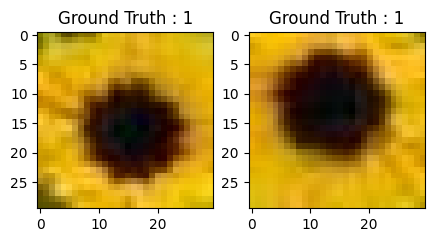

In [255]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

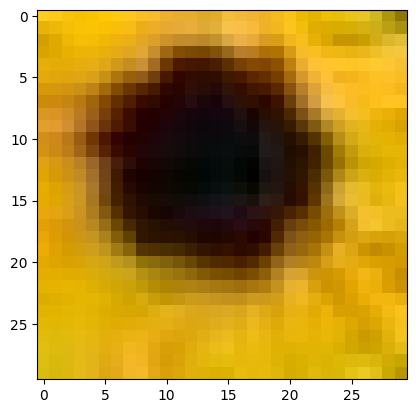

In [256]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [257]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 1
After conversion to one-hot: [0. 1. 0. 0. 0.]


# Creamos el Set de Entrenamiento y Validación

In [258]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [259]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(6036, 30, 30, 3) (1509, 30, 30, 3) (6036, 5) (1509, 5)


# Creamos el modelo de CNN

In [260]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 5e-4 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 40 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [261]:
flower_model = Sequential()
flower_model.add(Conv2D(16, kernel_size=(5, 5),activation='linear',padding='same',input_shape=(30,30,3)))
flower_model.add(LeakyReLU(alpha=0.1))
flower_model.add(MaxPooling2D((2, 2),padding='same'))
flower_model.add(Dropout(0.5))


flower_model.add(Flatten())
flower_model.add(Dense(32, activation='linear'))
flower_model.add(LeakyReLU(alpha=0.1))
flower_model.add(Dropout(0.5))
flower_model.add(Dense(nClasses, activation='softmax'))

In [262]:
flower_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 16)        1216      
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 30, 30, 16)        0         
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 16)        0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 15, 15, 16)        0         
                                                                 
 flatten_8 (Flatten)         (None, 3600)              0         
                                                                 
 dense_16 (Dense)            (None, 32)                115232    
                                                      

In [263]:
flower_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

# Entrenamos el modelo: Aprende a clasificar imágenes

In [264]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
flower_train = flower_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/40


95/95 [==============================] - 4s 26ms/step - loss: 1.6211 - accuracy: 0.2227 - val_loss: 1.5496 - val_accuracy: 0.3791
Epoch 2/40
95/95 [==============================] - 2s 24ms/step - loss: 1.5567 - accuracy: 0.3004 - val_loss: 1.4860 - val_accuracy: 0.6024
Epoch 3/40
95/95 [==============================] - 2s 18ms/step - loss: 1.4913 - accuracy: 0.3743 - val_loss: 1.4091 - val_accuracy: 0.6600
Epoch 4/40
95/95 [==============================] - 2s 24ms/step - loss: 1.4188 - accuracy: 0.4405 - val_loss: 1.3132 - val_accuracy: 0.6991
Epoch 5/40
95/95 [==============================] - 3s 33ms/step - loss: 1.3361 - accuracy: 0.4947 - val_loss: 1.2001 - val_accuracy: 0.7329
Epoch 6/40
95/95 [==============================] - 2s 23ms/step - loss: 1.2362 - accuracy: 0.5533 - val_loss: 1.0696 - val_accuracy: 0.7614
Epoch 7/40
95/95 [==============================] - 2s 26ms/step - loss: 1.1402 - accuracy: 0.5866 - val_loss: 0.9431 - val_accuracy: 0.7813
Epoch 8/40
95/95 [======

In [265]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
flower_model.save("C:/Users/Gabo/Pictures/DatasetFlores/Modelos/Modelo5/flores.h5py")

INFO:tensorflow:Assets written to: C:/Users/Gabo/Pictures/DatasetFlores/Modelos/Modelo5/flores.h5py\assets


INFO:tensorflow:Assets written to: C:/Users/Gabo/Pictures/DatasetFlores/Modelos/Modelo5/flores.h5py\assets


# Evaluamos la red

In [266]:
flower_model = load_model("C:/Users/Gabo/Pictures/DatasetFlores/Modelos/Modelo5/flores.h5py")

In [267]:
test_eval = flower_model.evaluate(test_X, test_Y_one_hot, verbose=1)

59/59 [==============================] - 1s 6ms/step - loss: 0.1682 - accuracy: 0.9550


In [268]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.1681533008813858
Test accuracy: 0.954954981803894


In [269]:
flower_train.history

{'loss': [1.6211434602737427,
  1.5566520690917969,
  1.4913172721862793,
  1.4188181161880493,
  1.3361092805862427,
  1.2361514568328857,
  1.1402441263198853,
  1.026947259902954,
  0.94742351770401,
  0.872441291809082,
  0.8047655820846558,
  0.751986563205719,
  0.6969266533851624,
  0.6560447812080383,
  0.6239023804664612,
  0.5988621711730957,
  0.5728873610496521,
  0.5434001088142395,
  0.5192780494689941,
  0.5047757029533386,
  0.48812755942344666,
  0.4658980667591095,
  0.45453330874443054,
  0.4317012429237366,
  0.41845276951789856,
  0.41279783844947815,
  0.3922039568424225,
  0.3935720920562744,
  0.3859195411205292,
  0.37299683690071106,
  0.3607122004032135,
  0.34651175141334534,
  0.3429003655910492,
  0.342289537191391,
  0.34477823972702026,
  0.3336239457130432,
  0.3294634222984314,
  0.3164011240005493,
  0.3247118592262268,
  0.3112761676311493],
 'accuracy': [0.222664013504982,
  0.30036449432373047,
  0.3742544651031494,
  0.44052353501319885,
  0.49469

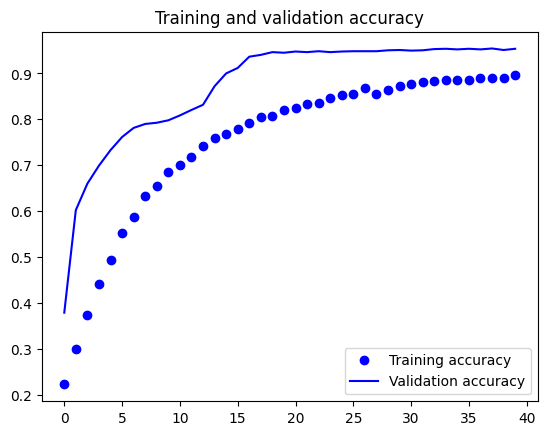

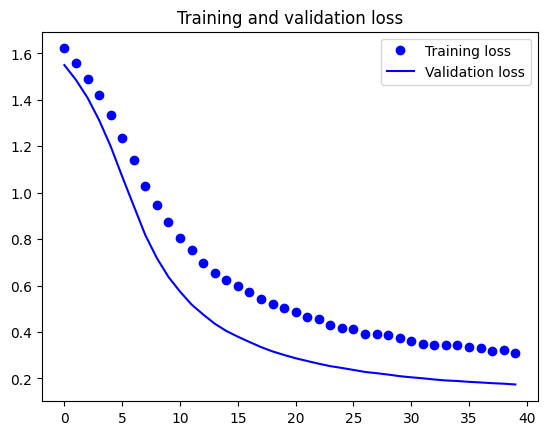

In [270]:
accuracy = flower_train.history['accuracy']
val_accuracy = flower_train.history['val_accuracy']
loss = flower_train.history['loss']
val_loss = flower_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [271]:
predicted_classes2 = flower_model.predict(test_X)

59/59 [==============================] - 0s 4ms/step


In [272]:
predicted_classes=[]
for predicted_flower in predicted_classes2:
    predicted_classes.append(predicted_flower.tolist().index(max(predicted_flower)))
predicted_classes=np.array(predicted_classes)

In [273]:
predicted_classes.shape, test_Y.shape

((1887,), (1887,))

# Aprendamos de los errores: Qué mejorar

Found 1802 correct labels


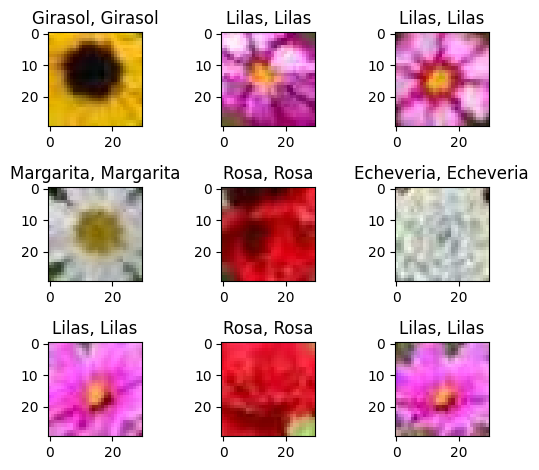

In [274]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(30,30,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(flores[predicted_classes[correct]], flores[test_Y[correct]]))

    plt.tight_layout()

Found 85 incorrect labels


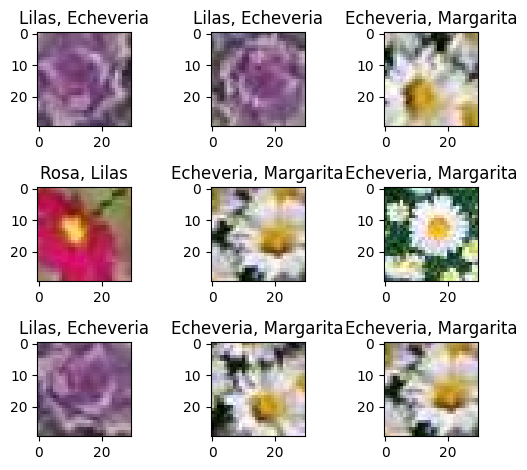

In [275]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(30,30,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(flores[predicted_classes[incorrect]], flores[test_Y[incorrect]]))
    plt.tight_layout()

In [276]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.88      0.95      0.91       389
     Class 1       0.99      0.99      0.99       386
     Class 2       0.95      0.97      0.96       352
     Class 3       0.99      0.88      0.93       403
     Class 4       0.98      0.99      0.98       357

    accuracy                           0.95      1887
   macro avg       0.96      0.96      0.96      1887
weighted avg       0.96      0.95      0.95      1887



# Código para probar la CNN

In [46]:
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image
import os

# Carga del modelo
model = load_model('C:/Users/Gabo/Pictures/DatasetFlores/Modelos/Modelo5/flores.h5py')

# Procesamiento de la imagen
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((30, 30))  # Asegúrate de ajustar el tamaño a 30x30 si es lo que estás usando ahora
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Ruta de la imagen que deseas probar
image_path = 'C:/Users/Gabo/Pictures/DatasetFlores/Pruebas2/Girasol2.jpg'

# Preprocesamiento de la imagen
image = preprocess_image(image_path)

# Realizar predicciones
predictions = model.predict(image)

# Obtener la etiqueta de la clase predicha
predicted_class = np.argmax(predictions)

# Mostrar resultados
print(f'Imagen: {image_path}, Clase predicha: {predicted_class}')


1/1 [==============================] - 0s 386ms/step
Imagen: C:/Users/Gabo/Pictures/DatasetFlores/Pruebas2/Girasol2.jpg, Clase predicha: 1


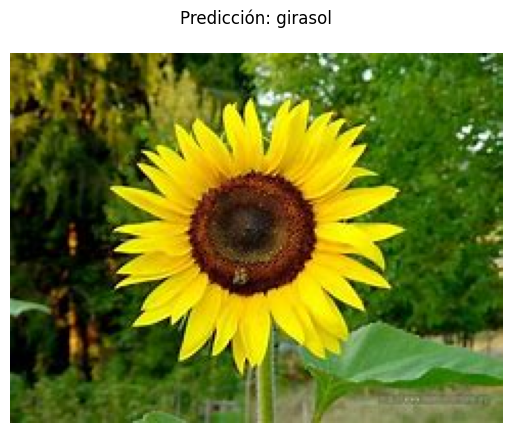

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Mostrar la imagen y la predicción
plt.imshow(Image.open(image_path))
predicted_class = np.argmax(predictions, axis=1)
class_labels = ["echeveria", "girasol", "lila",  "margarita", "rosa"]
predicted_labels = [class_labels[i] for i in predicted_class]
plt.title(f'Predicción: {predicted_labels[0]}\n')
plt.axis('off')
plt.show()
